# **Lab-2 : Linear Regression**
---



**Submitted by:** Ankit Majhi  
**Roll No:** ACE079BCT009

---



## **Objective**

+ To train and evaluate linear regression models.
+ To compare single-feature vs multi-feature regression models.




## **Background**

**Artificial Intelligence (AI):**

+ A broad field focused on creating systems that can perform tasks requiring human-like intelligence, such as learning, reasoning, and decision-making.

**Machine Learning (ML):**

+ The system learns from data and finds patterns instead of being fully hard-coded.

**Deep Learning (DL):**

+ A subset of ML that uses multi-layer neural networks to model complex patterns, commonly applied in image, speech, and text processing.

**Data Science:**

+ The broader process that involves collecting, cleaning, exploring, visualizing, and modeling data to extract meaningful insights and support decision-making.

## **Task 1: Simple Linear Regression**

### 1. Data Retrieval and Collection

In [15]:
import pandas as pd

# Load dataset from CSV
df = pd.read_csv("housing.csv")

# Display basic info
print("Shape of dataset:", df.shape)
print("Column names:")
print(df.columns)

Shape of dataset: (20640, 10)
Column names:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')


In [16]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# Fill missing numerical values with column mean
df = df.fillna(df.mean(numeric_only=True))

In [18]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 2. Data Cleaning

In [19]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object



### How the missing values were treated

Some features (such as total_bedrooms) contained missing values. Missing values are handled by either:

Removing rows with missing values, or

Replacing them with a statistical measure such as the mean.

This ensures the dataset contains no null values that could negatively affect model training. All features are verified to be numerical, which is required for linear regression.

### 3. Feature Design


In [20]:

X = df[['housing_median_age']]
y = df['median_house_value']


### Why Housing median was chosen as the only feature

Housing_median_age is chosen because it is a simple, intuitive feature that may influence house prices (older or newer houses can affect value). Using a single feature helps understand how linear regression works at a basic level. The feature matrix (X) and target vector (y) are separated for training.


### 4. Algorithm Selection

Linear Regression is selected because:

+ The target variable is continuous

+ The goal is to model a linear relationship between one input feature and the output

+ Linear regression is simple, interpretable, and suitable for baseline modeling


### 5. Loss Function 
Mean Squared Error (MSE) is used as the loss function.

MSE measures the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily, making it useful for regression problems.

### 6. Model Learning(Training)



The dataset is split into:

+ Training set (used to learn model parameters)

+ Testing set (used to evaluate performance)

During training, the model learns:

+ The slope (coefficient) that best fits the data

+ The intercept that minimizes prediction error

This is done by minimizing the Mean Squared Error.


In [21]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 7. Model Evaluation

In [22]:

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model_simple.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 12939617265.100323
R² Score: 0.012551235533311389



The trained model is evaluated on unseen test data.

Reported metrics:

+ Mean Squared Error (MSE): Indicates average prediction error

+ R² Score (optional): Shows how much variance in housing prices is explained by the model

Interpretation: A high MSE and low R² indicate that a single feature is not sufficient to accurately predict house prices.


### Model Interpretation

In [23]:
print("Coefficient:", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)

Coefficient: 951.4618671495982
Intercept: 179975.00158647486



Coefficient (Slope)

The coefficient represents the change in median house value for each one-unit increase in housing median age, assuming all else remains constant.

Intercept

The intercept represents the predicted house value when housing median age is zero. While not always meaningful in real-world terms, it is necessary for forming the regression equation

### Visualization


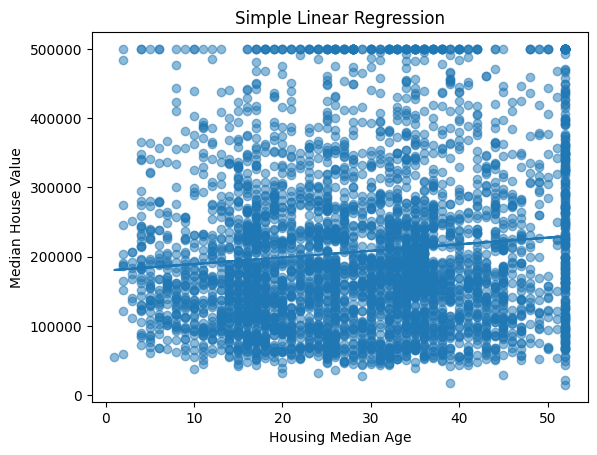

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred)
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()

### Regression Line Visualization


The regression line shows the relationship between house age and predicted house value. The scattered points indicate weak correlation.

### Predicted vs Actual Plot


Large deviations from the diagonal line indicate poor prediction accuracy.

### Assumptions of Linear Regression

+ Linear relationship between X and y

+ Errors are independent

+ Constant variance of errors (homoscedasticity)

+ Errors are normally distributed

Some of these assumptions are weakly satisfied in this task.

## **Task 2: Multiple Linear Regression**

In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_multi = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:

model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Why multiple features may improve prediction performance

Feature scaling is applied where necessary because features have different ranges (e.g., population vs median income). Using multiple features helps capture more complex relationships affecting house prices.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)


y_pred_multi = model_multi.predict(X_test_scaled)


print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))

MSE: 5052953703.90163
R² Score: 0.6143987268246023


### Model Interpretation

In [28]:

print("Intercept:", model_multi.intercept_)

coefficients = pd.Series(model_multi.coef_, index=X_multi.columns)
print(coefficients)

Intercept: 207194.69373788807
longitude            -85503.218153
latitude             -90698.848803
housing_median_age    14905.906448
total_rooms          -17805.418501
total_bedrooms        48712.343341
population           -43766.491159
households            17654.500659
median_income         77194.699466
dtype: float64



Intercept

The intercept represents the predicted house value when all input features are zero.

Coefficients

Each coefficient represents the expected change in median house value for a one-unit increase in that feature, assuming all other features remain constant.

Example interpretations:

+ A positive coefficient → feature increases house value

+ A negative coefficient → feature decreases house value



### Difference from Single-Feature Model



+ Uses multiple predictors instead of one

+ Captures interactions and combined effects

+ Higher accuracy but more complex interpretation


### Which model performs better?

The multiple linear regression model performs better because it uses several input features, allowing it to learn more information about factors affecting house prices.

### Why does using multiple features help or hurt performance?

Using multiple features helps improve prediction accuracy by capturing different influences on house prices. However, performance may decrease if irrelevant features or strong correlations between features cause overfitting.

### Which model is easier to interpret?

The single-feature linear regression model is easier to interpret since it involves only one coefficient, making the relationship between input and output simple and clear.

## **DISCUSSION AND CONCLUSION**

In this lab, linear regression was applied in two different ways to understand how house prices can be predicted from the given dataset. First, a simple linear regression model was created using only one feature, housing_median_age. This helped in understanding how a single variable relates to the target value. The model was easy to visualize and interpret, but its prediction errors showed that one feature alone cannot explain the variation in house prices very well.After that, multiple linear regression was implemented using several features from the dataset.This model considered many factors at the same time, such as population, rooms, and location-related attributes. Because of this, it was able to learn more information from the data and provide better predictions compared to the single-feature model.The comparison between the two models clearly shows that while simple linear regression is helpful for understanding basic relationships, it is not sufficient for accurate prediction in real-world datasets where many factors influence the result. The multiple linear regression model reduced the error because it captured the combined effect of different features.

The single-feature model was useful for learning and visualization, but it lacked accuracy. On the other hand, the multiple linear regression model performed better because it used more relevant information from the dataset. This shows that in practical problems, considering multiple factors is necessary to build a reliable model.